In [ ]:
#dataset retirado de https://www.kaggle.com/gangliu/oc2emission
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
df.MODELYEAR.unique()

array([2014])

In [ ]:
#como todos os modelos são de 2014, eu resolvi tirar essa coluna do dataset
df.drop(columns=['MODELYEAR'], inplace=True)
df.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.FUELTYPE.unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [ ]:
df.TRANSMISSION.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

In [ ]:
df.ENGINESIZE.unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2, 6. ,
       6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 1.8, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4])

In [ ]:
df.CYLINDERS.unique()

array([ 4,  6, 12,  8, 10,  3,  5])

In [ ]:
df.MAKE.unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

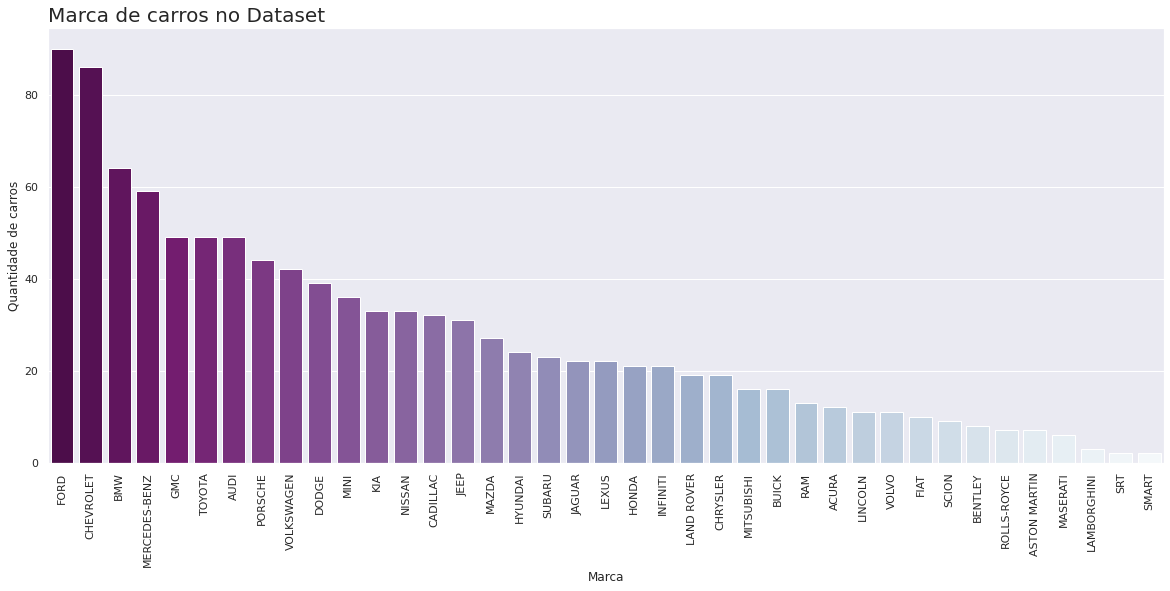

In [ ]:
plt.figure(figsize=(20,8))


sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.set_theme(style="darkgrid")
sns.countplot(x='MAKE', data=df, order=df['MAKE'].value_counts().index,
              palette='BuPu_r')
plt.title('Marca de carros no Dataset', loc='left', fontsize= 20)
plt.ylabel('Quantidade de carros')
plt.xlabel('Marca')
plt.xticks(rotation= 90)
plt.show()

In [ ]:
correlacao = df.corr()
correlacao

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


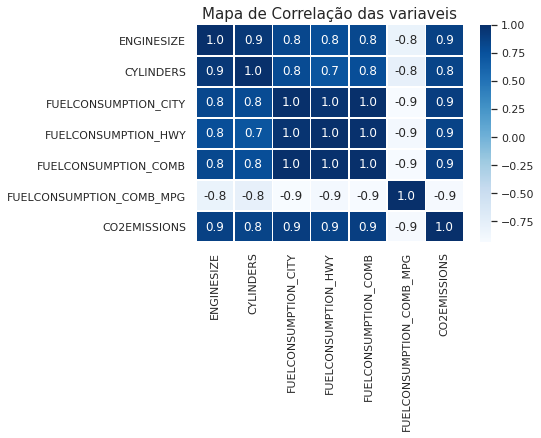

In [ ]:
sns.heatmap(correlacao, cmap='Blues',annot= True, fmt='.1f', linewidths=.5)
plt.title('Mapa de Correlação das variaveis', fontsize= 15)
plt.show()

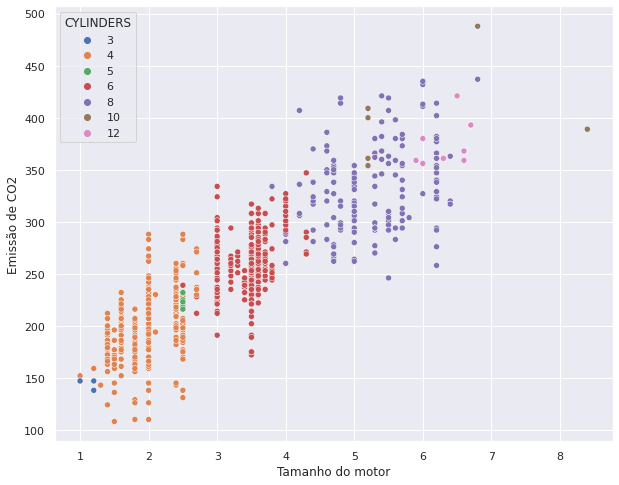

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x= 'ENGINESIZE', y='CO2EMISSIONS', hue='CYLINDERS', palette='deep')
plt.xlabel('Tamanho do motor')
plt.ylabel('Emissão de CO2')
plt.show()

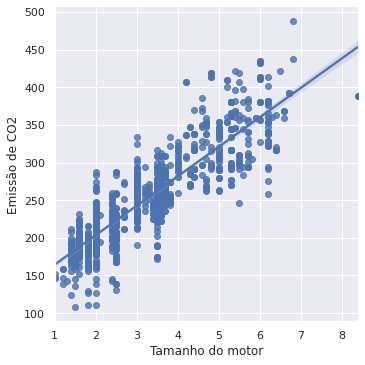

In [ ]:
sns.lmplot(data=df, x= 'ENGINESIZE', y='CO2EMISSIONS')
plt.xlabel('Tamanho do motor')
plt.ylabel('Emissão de CO2')
plt.show()

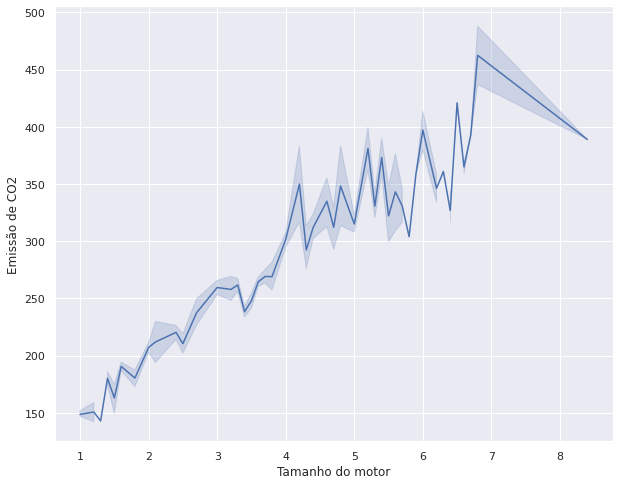

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x= 'ENGINESIZE', y='CO2EMISSIONS')
plt.xlabel('Tamanho do motor')
plt.ylabel('Emissão de CO2')
plt.show()

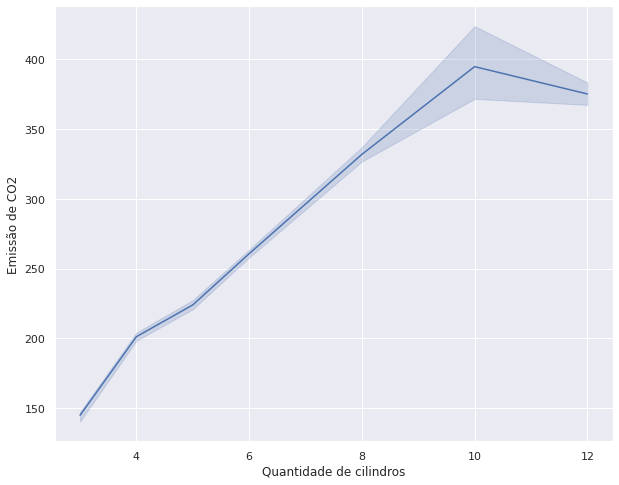

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x= 'CYLINDERS', y='CO2EMISSIONS')
plt.ylabel('Emissão de CO2')
plt.xlabel('Quantidade de cilindros')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
y= df[['CO2EMISSIONS']]
x= df[['ENGINESIZE']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state= 7)

In [ ]:
x_train.shape

(746, 1)

In [ ]:
y_train.shape

(746, 1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics



modelo= LinearRegression()
modelo.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f'R² = {modelo.score(x_train, y_train).round(2)}')

R² = 0.77


In [ ]:
y_previsto = modelo.predict(x_test)
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)} ')

R² = 0.76 


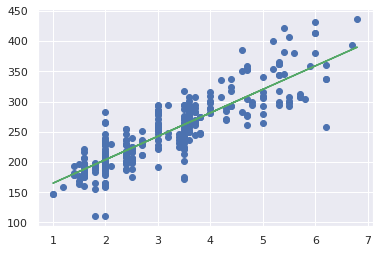

In [ ]:
plt.scatter(x_test,y_test)

plt.plot(x_test , y_previsto , "g-")
#https://lalitha-notes.netlify.app/simple_linear_regression_medium